### Data Dictionary
- `survival`: 0 = No, 1 = Yes

- `pclass`: Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd

- `Age`: Age in years 	

- `sibsp`: number of siblings / spouses aboard the Titanic 	

- `parch`: number of parents / children aboard the Titanic 	

- `IsMale`: 0 = No, 1 = Yes

- `fare`: Passenger fare 	

- `embarked`: Port of Embarkatio C = Cherbourg, Q = Queenstown, S = Southampton


### Import the essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("pastel")
SEED = np.random.seed(9)

In [2]:
path = '../../data/processed/'

train = pd.read_csv(f'{path}train_processed.csv')
test = pd.read_csv(f'{path}test_processed.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,IsMale,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,0,1
888,889,0,3,28.0,1,2,23.4500,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,1,0,0


In [4]:
test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,IsMale,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,1,0,1,0
1,893,3,47.0,1,0,7.0000,0,0,0,1
2,894,2,62.0,0,0,9.6875,1,0,1,0
3,895,3,27.0,0,0,8.6625,1,0,0,1
4,896,3,22.0,1,1,12.2875,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,27.0,0,0,8.0500,1,0,0,1
414,1306,1,39.0,0,0,108.9000,0,1,0,0
415,1307,3,38.5,0,0,7.2500,1,0,0,1
416,1308,3,27.0,0,0,8.0500,1,0,0,1


- Plotting a boxplot of the variables to see their scale now that we only have numerical columns

- Removing the `PassengerId` column, as its values don't hold any particular meaning other than being sequential IDs for passengers

In [62]:
boxplot_df = train.drop(columns='PassengerId')
boxplot_df

,Survived,Pclass,Age,SibSp,Parch,Fare,IsMale,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,0,1
887,1,1,19.0,0,0,30.0000,0,0,0,1
888,0,3,28.0,1,2,23.4500,0,0,0,1
889,1,1,26.0,0,0,30.0000,1,1,0,0


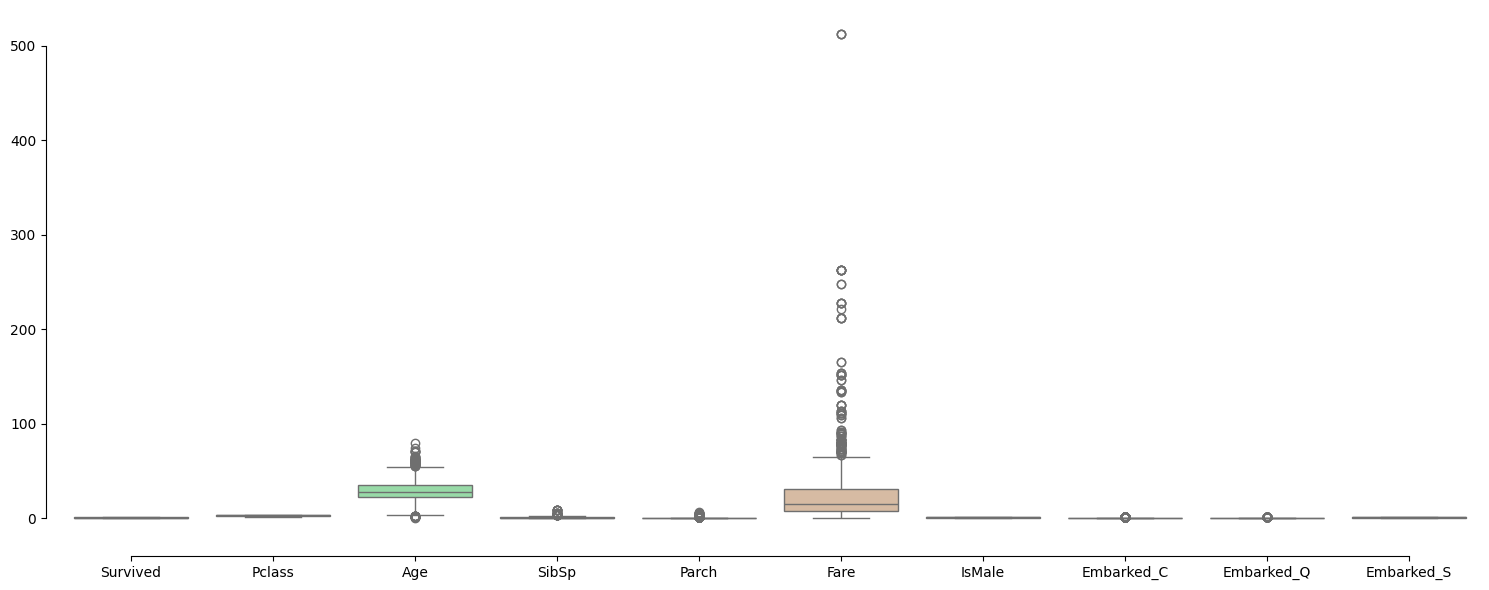

In [63]:
f, ax = plt.subplots(figsize=(15, 6))

sns.boxplot(data=boxplot_df,  ax=ax)
sns.despine(offset=10, trim=True)
plt.tight_layout()
plt.show()

- The values are highly disparate, which can interfere with the machine learning model. We need to perform normalization